In [70]:
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [72]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6534,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [73]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

In [74]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates['Year'] = exchange_rates['Time'].dt.year
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [75]:
exchange_rates['US_dollar'].describe()

count     6535
unique    3785
top          -
freq        62
Name: US_dollar, dtype: object

In [76]:
exchange_rates['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

In [77]:
print(len(exchange_rates))
exchange_rates = exchange_rates[~(exchange_rates['US_dollar'] == '-')]
print(len(exchange_rates))

6535
6473


In [78]:
exchange_rates['US_dollar'].describe()

count       6473
unique      3784
top       1.2276
freq           9
Name: US_dollar, dtype: object

In [79]:
exchange_rates['rolling_mean'] = exchange_rates['US_dollar'].rolling(30).mean()

In [80]:
euro_to_us_exchange = exchange_rates[[
    'Time', 'Year', 'US_dollar', 'rolling_mean']]
euro_to_us_exchange.dtypes

Time            datetime64[ns]
Year                     int32
US_dollar               object
rolling_mean           float64
dtype: object

In [81]:
financial_crisis = euro_to_us_exchange[
    euro_to_us_exchange['Time'].dt.year.between(2006, 2009)]
financial_crisis.head()

,Time,Year,US_dollar,rolling_mean
1825,2006-01-02,2006,1.1826,1.183087
1826,2006-01-03,2006,1.1875,1.183300
1827,2006-01-04,2006,1.2083,1.184573
1828,2006-01-05,2006,1.2088,1.185613
1829,2006-01-06,2006,1.2093,1.186647


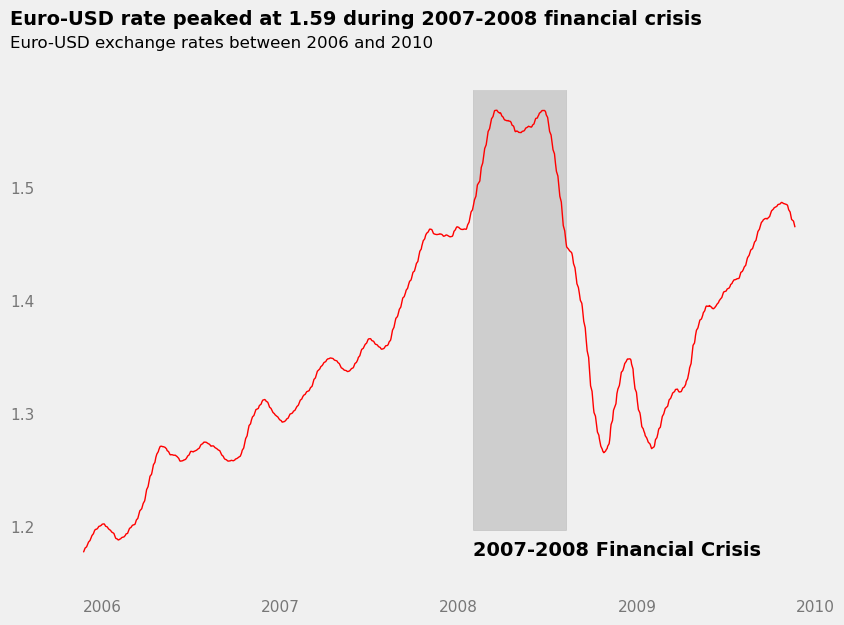

In [82]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='red')
ax.grid(False)

ax.set_yticklabels([])
ax.set_xticklabels([])

# Highlight the 2007-2008 period
ax.axvspan(xmin=13950, xmax=14140, ymin=0.09,
           alpha=0.3, color='grey')
ax.text(13950, 1.18, '2007-2008 Financial Crisis', color='black',
        weight='bold')

x = 13150.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.2
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13000, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

# Add title and subtitle
ax.text(13000, 1.65, "Euro-USD rate peaked at 1.59 during 2007-2008 financial crisis",
        weight='bold')
ax.text(13000, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

plt.show()